In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("datasets", train=True, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("datasets", train=False, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, 
                                      shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, 
                                      shuffle = True)

tensor(4)


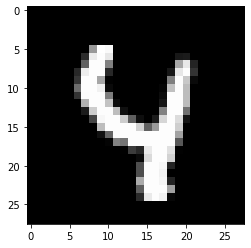

In [4]:
for data in trainset:
    break
x, y = data[0][0], data[1][0]
print(y)
plt.imshow(x.view(28, 28), cmap='gray')

In [7]:
class NNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Input = input layer (image), output = ouput layer
        self.fc1 = nn.Linear(28*28, 64) #(input, output)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # Ten outputs
        
    def forward(self, x):
        # Relu (retify linear) activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) 
        return F.log_softmax(x, dim=1) # dim = dimension
        
        
net = NNet()
#print(net)

In [9]:
optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad() # Reset gradient
        output = net(X.view(-1, 28*28)) 
        loss = F.nll_loss(output, y) # Compare output with actual val
        loss.backward() # Compute gradient
        optimizer.step()
    print(loss)

tensor(0.0025, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)


In [10]:
# Evaluate model

correct = 0
total = 0

# Look at network without calculating gradients for testing 
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if(torch.argmax(i) == y[idx]):
                correct += 1
            total += 1
            
print("Accuracy {}".format(round(correct/total, 3)))

Accuracy 0.981


tensor(5)


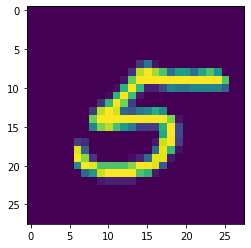

In [22]:
val = 9
print(torch.argmax(net(X[val].view(-1, 28*28))[0]))
plt.imshow(X[val].view(28, 28))